A Gaussian process ($GP$) is fully defined by its mean function and covariance function<sup>[1]</sup>. A [Gaussian process](https://en.wikipedia.org/wiki/Gaussian_process) is a [stochastic process](https://en.wikipedia.org/wiki/Stochastic_process)—a collection of random variables indexed by time or space—where any finite subset of these variables follows a multivariate normal distribution<sup>[2]</sup>. It could be interpreted as an infinite-dimensional generalization of [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). Since a Gaussian process is built upon the concept of the Gaussian distribution, we will first examine the Gaussian distribution to clarify the foundational ideas before delving deeper into this topic.

# A.&nbsp;Gaussian Distributions

In probability theory and statistics, a [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), also known as a Gaussian distribution, is a continuous probability distribution for a random variable with real values. Its probability density function has the following general form<sup>[3]</sup>:<br>

$$
f(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}
$$


$\mu$ is the mean or expectation of the distribution (also its median and mode), while the parameter $\sigma^2$ is the variance. We then use Python to visualize the univariate Gaussian distribution, allowing us to gain a clearer understanding of how the data is distributed.

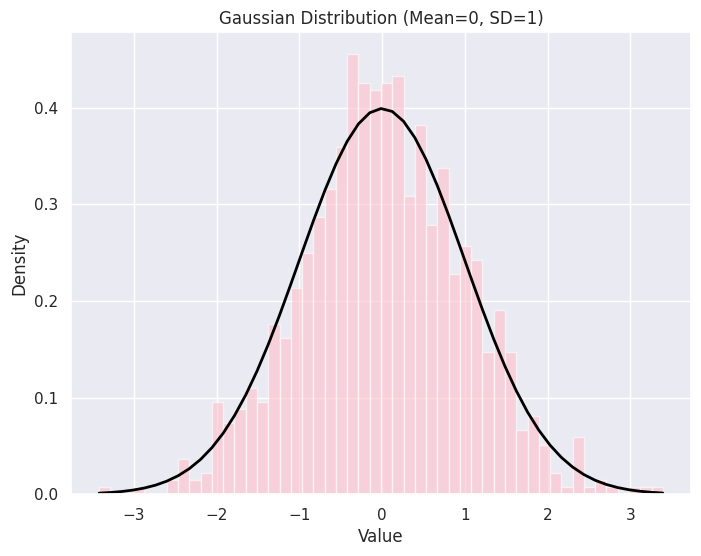

In [ ]:
# @title Click for details

import numpy as np
import matplotlib.pyplot as plt

def gaussian_pdf(x, mu, sigma):
  # Compute the probability density of the Gaussian distribution.
  return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Set the mean and standard deviation
mean = 0
std_dev = 1

# Generate 1000 points from a Gaussian distribution
data = np.random.normal(mean, std_dev, 1000)

# Create a histogram of the data with a density curve
plt.figure(figsize=(8, 6))
count, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.6, color='pink')

# Calculate the normal density function for each bin
normal_density = gaussian_pdf(bins, mean, std_dev)

# Plot the density function as a line
plt.plot(bins, normal_density, linewidth=2, color='black')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian Distribution (Mean={mean}, SD={std_dev})')
plt.grid(True)

We cannot always assume that our model will be univariate, as this could lead to uncertainties. In practice, the datasets we encounter are often multivariate, consisting of multiple measurements for each individual or experimental instance<sup>[4]</sup>. To address more complex tasks, we will then introduce the multivariate Gaussian distribution as a foundational tool.

In [ ]:
%reset -f
# Clear all previously defined variables and functions

# B.&nbsp;Multivariate Normal&nbsp;(Gaussian) Distributions 💥

The [multivariate normal (Gaussian) distribution](https://en.wikipedia.org/w/index.php?title=Multivariate_normal_distribution&oldid=1239971126) (**MVN**) is defined by a mean vector $\mathbf{\mu}$ and a covariance matrix $\mathbf{\Sigma}$. The probability density function \($PDF$\) for a multivariate Gaussian distribution in $d$ dimensions is given by<sup>[5]</sup>:

$$
f(\mathbf{x} \mid \boldsymbol{\mu}, \mathbf{\Sigma})=\frac{1}{\sqrt{(2 \pi)^d|\mathbf{\Sigma}|}} \exp \left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T \mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)
$$
<br>
where:
- $\mathbf{x}$ is the $d$-dimensional variable vector;
- $\mathbf{\mu}$ is the $d$-dimensional mean vector;
- $\mathbf{\Sigma}$ is the $d \times d$ covariance matrix;
- $|\mathbf{\Sigma}|$ denotes the determinant of the covariance matrix.

Let's further explore this from a **Bayesian** statistical perspective:<br>
<br>We will first need to distinguish how much we know about our Gaussian process model:<br>
* If both the mean $\boldsymbol{\mu}$ and the covariance matrix $\mathbf{\Sigma}$ are unknown, then the [Normal-inverse-Wishart](https://en.wikipedia.org/wiki/Normal-inverse-Wishart_distribution) (**NIW**) distribution serves as the conjugate prior. $\boldsymbol{\mu}$ follows a normal distribution and $\mathbf{\Sigma}$ follows an [inverse Wishart distribution](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) (**IW**). After observing data, the $\color{red}{\text{posterior}}$ distribution remains in the $\color{red}{\text{NIW family}}$.
* A conjugate prior on only one of the parameters (either $\boldsymbol{\mu}$ or $\mathbf{\Sigma}$) is a **semi-conjugate prior**, where the $\color{red}{\text{prior}}$ only partially conjugates with the $\color{red}{\text{likelihood}}$. However, we still have some knowledge about the uncertain parameters:
  <br>**(a)** The conjugate prior for unknown $\boldsymbol{\mu}$ is a $\color{red}{\text{multivariate normal distribution}}$.
  <br>**(b)** The conjugate prior for unknown $\mathbf{\Sigma}$ is the [inverse Wishart distribution](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution). \(Recall the definition of a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior)\)
  

<br>Consider a joint sampling model $\mathbf{Y_1}, … ,\mathbf{Y_n} \mid \boldsymbol{\theta}, \mathbf{Σ} \sim \color{purple}{\text{MVN}}(\boldsymbol{θ}, \mathbf{\Sigma})$, where $Y_i \in \mathbb{R}^d$, $\boldsymbol{\theta}$ is the parameter vector for which $\boldsymbol{\mu}$ is a component.


Let's consider the case where the $\boldsymbol{\theta}$ is unknown (See above **(a)**). We will specify a $\color{blue}{\textbf{conjugate prior}}$ for $\boldsymbol{\theta}$, assuming it follows a multivariate normal distribution with parameters $\mathbf{\mu_0}$ and $\boldsymbol{\Lambda}_0$:
$$p(\boldsymbol{\theta}) = \text{multivariate normal}(\mathbf{\mu_0}, \boldsymbol{\Lambda}_0)$$
$$
\begin{align*}
p(\boldsymbol{\theta}) &= (2 \pi)^{-\frac{d}{2}} |\boldsymbol{\Lambda}_0|^{-\frac{1}{2}} \exp\left(-\frac{1}{2}(\boldsymbol{\theta}-\mathbf{\mu}_0)^T \boldsymbol{\Lambda}_0^{-1}(\boldsymbol{\theta}-\mathbf{\mu}_0)\right) \\
&\propto \exp\left(-\frac{1}{2}\boldsymbol{\theta}^T \boldsymbol{\Lambda}_0^{-1}\boldsymbol{\theta} + \frac{1}{2}\boldsymbol{\theta}^T \boldsymbol{\Lambda}_0^{-1} \mathbf{\mu}_0 + \frac{1}{2}\boldsymbol{\mu}_0^T \boldsymbol{\Lambda}_0^{-1} \boldsymbol{\theta} -\frac{1}{2} \color{red}{\mathbf{\mu}_0^T \boldsymbol{\Lambda}_0^{-1} \mathbf{\mu}_0} \right) \\
& \propto \exp(-\frac{1}{2}\boldsymbol{\theta}^T \boldsymbol{\Lambda}_0^{-1}\boldsymbol{\theta} + \boldsymbol{\theta}^T \boldsymbol{\Lambda}_0^{-1} \mathbf{\mu}_0) \\
&=\exp(-\frac{1}{2}\boldsymbol{\theta}^T \mathbf{A}_0 \boldsymbol{\theta} + \boldsymbol{\theta}^T \mathbf{b}_0)
\end{align*}
$$<br>
with $\mathbf{A}_0=\boldsymbol{\Lambda}_0^{-1}$ representing the $\color{red}{\textbf{prior precision}}$, and $\mathbf{b}_0=\boldsymbol{\Lambda}_0^{-1} \mathbf{\mu}_0$ the $\color{red}{\textbf{weighted prior mean}}$. Notice that $\boldsymbol{\theta}^T \mathbf{A}_0 \boldsymbol{\theta}$ is a quadratic term, while $\boldsymbol{\theta}^T \mathbf{b}_0$ is a linear term. The $\color{red}{\text{constant term}}$ in red is being dropped because it does not affect the form of the posterior distribution (as constants do not influence the shape of the distribution in terms of $\boldsymbol{\theta}$).<br>
We could also rewrite $\boldsymbol{\theta} \sim \text{MVN}(\mathbf{\mu}_0, \boldsymbol{\Lambda}_0) = \color{purple}{\text{MVN}}(\mathbf{A}_0^{-1} \mathbf{b}_0, \mathbf{A}_0^{-1})$

We then derive the $\color{blue}{\textbf{likelihood}}$:<br>
$$
\begin{align*}
p(\mathbf{y_1}, \dots, \mathbf{y_n} \mid \boldsymbol{\theta}, \mathbf{\Sigma}) &= \prod_{i=1}^n (2 \pi)^{-\frac{d}{2}} |\mathbf{\Sigma}|^{-\frac{1}{2}} \exp\left(-\frac{1}{2}(\mathbf{y_i}-\boldsymbol{\theta})^T \mathbf{\Sigma}^{-1}(\mathbf{y_i}-\boldsymbol{\theta})\right) \\
&\propto \exp\left(-\frac{1}{2}\boldsymbol{\theta}^T n \mathbf{\Sigma}^{-1}\boldsymbol{\theta} + \boldsymbol{\theta}^T \mathbf{\Sigma}^{-1} (\sum_{i=1}^n \mathbf{y_i})-\frac{1}{2} \sum_{i=1}^n\color{red}{(\mathbf{y_i}^T \mathbf{\Sigma}^{-1} \mathbf{y_i})} \right) \\
&\propto \exp(-\frac{1}{2} \boldsymbol{\theta}^T \mathbf{A}_1 \boldsymbol{\theta} + \boldsymbol{\theta}^T \mathbf{b}_1)
\end{align*}
$$<br>
with $\mathbf{A}_1 = n \mathbf{\Sigma}^{-1}$ representing the $\color{red}{\textbf{data precision}}$ and $\mathbf{b}_1 = \mathbf{\Sigma}^{-1}\sum_{i=1}^n\mathbf{y_i} = n \mathbf{\Sigma}^{-1} \mathbf{\bar{y}}$ the $ \color{red}{\textbf{weighted sum of data}}$.

Computes the $\color{blue}{\text{posterior}}$ probability according to [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):<br>
$$
\begin{align*}
p(\boldsymbol{\theta} \mid \mathbf{y_1}, \dots, \mathbf{y_n}, \mathbf{\Sigma}) & \propto p(\mathbf{y_1}, \dots, \mathbf{y_n} \mid \boldsymbol{\theta}, \mathbf{\Sigma}) \times p(\boldsymbol{\theta} \mid \mathbf{\Sigma})\\
&=p(\mathbf{y_1}, \dots, \mathbf{y_n} \mid \boldsymbol{\theta}, \mathbf{\Sigma}) \times p(\boldsymbol{\theta}) \\
& \propto \exp(-\frac{1}{2} \boldsymbol{\theta}^T \mathbf{A}_1 \boldsymbol{\theta} + \boldsymbol{\theta}^T \mathbf{b}_1) \times \exp(-\frac{1}{2}\boldsymbol{\theta}^T \mathbf{A}_0 \boldsymbol{\theta} + \boldsymbol{\theta}^T \mathbf{b}_0) \\
& = \exp(-\frac{1}{2} \boldsymbol{\theta}^T (\mathbf{A}_0 + \mathbf{A}_1) \boldsymbol{\theta} + \boldsymbol{\theta}^T (\mathbf{b}_0 + \mathbf{b}_1) \\
& = \exp(-\frac{1}{2} \boldsymbol{\theta}^T (\color{orange}{\mathbf{A}_n}) \boldsymbol{\theta} + \boldsymbol{\theta}^T (\color{orange}{\mathbf{b}_n}))
\end{align*}
$$<br>
Given the observations $\mathbf{y}_1, \ldots, \mathbf{y}_n$ and a known covariance matrix $\boldsymbol{\Sigma}$, the full conditional distribution of the parameter vector $\boldsymbol{\theta}$ follows a multivariate normal distribution: $\boldsymbol{\theta} \mid \mathbf{y}_1, \ldots, \mathbf{y}_n, \boldsymbol{\Sigma} \sim \operatorname{MVN}\left(\mathbf{A}_n^{-1} \mathbf{b}_n, \mathbf{A}_n^{-1}\right)$, where $\mathbf{A}_n$ and $\mathbf{b}_n$ are functions of the observations and $\boldsymbol{\Sigma}$.<br>
$$
\begin{align*}
{A}_n &= \mathbf{A}_0 + \mathbf{A}_1 = \boldsymbol{\Lambda}_0^{-1} + n \mathbf{\Sigma}^{-1} = \color{red}{\textbf{Posterior precision}} = \color{red}{\textbf{Prior precision}} + \color{red}{\textbf{Data precision}} \\
\mathbf{b}_n &= \mathbf{b}_0 + \mathbf{b}_1 = \mathbf{b}_0=\boldsymbol{\Lambda}_0^{-1} \mathbf{\mu}_0 + n \mathbf{\Sigma}^{-1} \mathbf{\bar{y}} = \color{red}{\textbf{Weighted sum of $\mathbf{\mu}_0$ and $\mathbf{\bar{y}}$}}
\end{align*}
$$

## B.1&nbsp;Bivariate Gaussian Distribution

We will begin our exploration with the bivariate case, which represents the most fundamental scenario in the study of multivariate Gaussian distributions. To lay the groundwork, we consider the probability density function (PDF) of a vector $[\mathrm{X}, \mathrm{Y}]$, which is defined as follows<sup>[5]</sup>:<br>
$$
f(x, y)=\frac{1}{2 \pi \sigma_X \sigma_Y \sqrt{1-\rho^2}} \exp \left(-\frac{1}{2\left[1-\rho^2\right]}\left[\left(\frac{x-\mu_X}{\sigma_X}\right)^2-2 \rho\left(\frac{x-\mu_X}{\sigma_X}\right)\left(\frac{y-\mu_Y}{\sigma_Y}\right)+\left(\frac{y-\mu_Y}{\sigma_Y}\right)^2\right]\right)
$$<br>
[$\rho$](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is the correlation between $X$ and $Y$ and $\sigma_X>0$ and $\sigma_Y>0$.<br>
$$
\boldsymbol{\mu}=\binom{\mu_X}{\mu_Y}, \quad \boldsymbol{\Sigma}=\left(\begin{array}{cc}
\sigma_X^2 & \rho \sigma_X \sigma_Y \\
\rho \sigma_X \sigma_Y & \sigma_Y^2
\end{array}\right)
$$<br>
In the context of the bivariate Gaussian distribution, establishing the normality of the joint distribution of the vector $[\mathrm{X}, \mathrm{Y}]$ can be simplified compared to higher-dimensional cases. Specifically, a countably infinite set of $\color{red}{\text{distinct linear combinations}}$ of $X$ and $Y$ follows $\color{red}{\text{normal distributions}}$ so that $[\mathrm{X}, \mathrm{Y}]$ itself is jointly bivariate normal<sup>[6]</sup>. This provides a more accessible criterion for confirming the multivariate normality in the two-variable case.

In this case, we assume a zero prior mean vector, $\boldsymbol{\mu}=\binom{\mu_X}{\mu_Y}=\binom{0}{0}$. This assumption is commonly made because setting the prior mean to zero offers greater flexibility in modeling by allowing the $\color{red}{\text{data}}$ and the $\color{red}{\text{covariance}}$ of the process to primarily inform the $\color{red}{\text{posterior estimates}}$. We will define the covariance matrix as follows:<br>
$$
\boldsymbol{\Sigma} = \begin{bmatrix}
\sigma_X^2 & \rho \sigma_X \sigma_Y \\
\rho \sigma_X \sigma_Y & \sigma_Y^2
\end{bmatrix} = \begin{bmatrix}
2 & 0.4 \\
0.4 & 0.1
\end{bmatrix}
$$<br>
For here, we will not explore the physical implications of this covariance matrix nor derive the Pearson correlation coefficients [$\rho$](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) from it. We then visualize the bivariate Gaussian distribution to gain a clearer understanding of how the data is distributed.

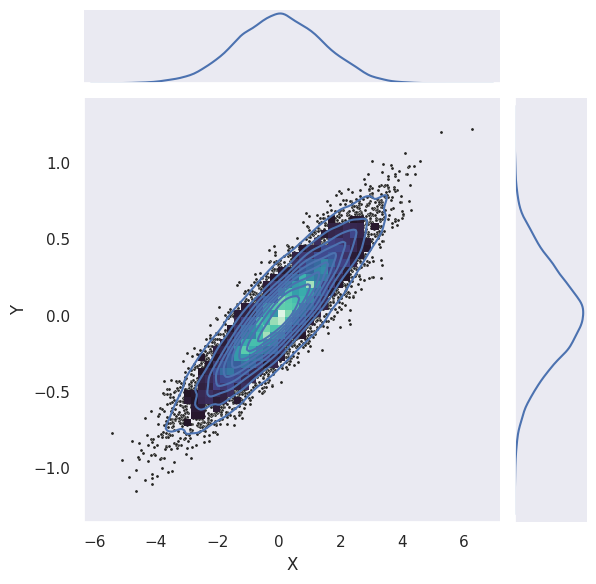

In [ ]:
# @title Click for details
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian distribution
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .1)]
rng = np.random.RandomState(0)
data = rng.multivariate_normal(mean, cov, n).T
df = pd.DataFrame(data=data.T, columns=["X", "Y"]) # Input data structure <= pandas.DataFrame, numpy.ndarray, etc

# Draw a combo histogram and scatterplot with density contours
g = sns.jointplot(data=df, x="X", y="Y", kind="kde")
g.plot_joint(sns.scatterplot, s=5, color=".15")
g.plot_joint(sns.histplot, bins=50, pthresh=.1, cmap="mako")

When plotting the iso-density contours of this bivariate normal distribution in the $x$,$y$-plane, these contours form ellipses. The $\color{red}{\text{orientation}}$ and $\color{purple}{\text{scale}}$ of these ellipses are dictated by the $\color{red}{\text{eigenvectors}}$ and $\color{purple}{\text{eigenvalues}}$ of the covariance matrix $\boldsymbol{\Sigma}$. The $\color{red}{\text{principal axes}}$ of the ellipses correspond to the eigenvectors of the covariance matrix, and the $\color{purple}{\text{lengths}}$ of these axes are proportional to the square roots of the corresponding eigenvalues, arranged in descending order<sup>[5]</sup>. The PDF of a bivariate normal distribution can also be visualized as follows:

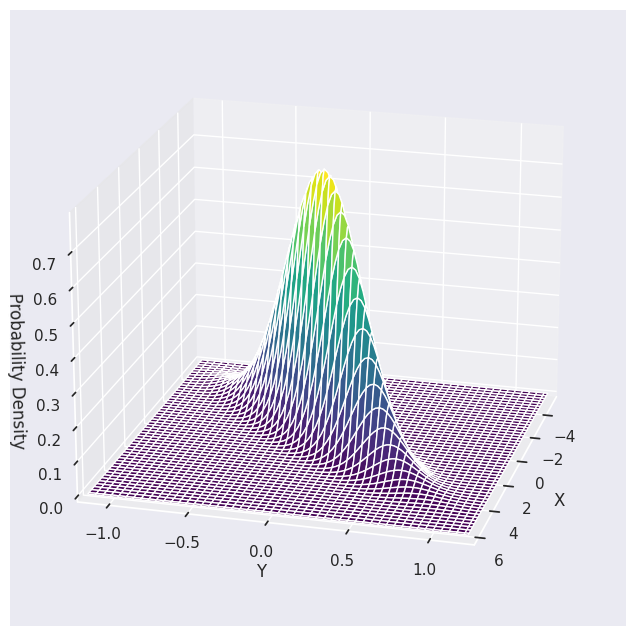

In [ ]:
# @title Click for details
from scipy.stats import multivariate_normal

# Generate grid points
x1 = np.linspace(df['X'].min(), df['X'].max(), 100)
x2 = np.linspace(df['Y'].min(), df['Y'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack([X1.ravel(), X2.ravel()])

# Calculate the multivariate normal probability density
y = multivariate_normal.pdf(X, mean=mean, cov=cov)
y = y.reshape(X1.shape)

# Plotting the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # '111' implies that there is only one subplot
ax.plot_surface(X1, X2, y, cmap='viridis') # cmap => color map

ax.set_xlim(df['X'].min(), df['X'].max())
ax.set_ylim(df['Y'].min(), df['Y'].max())
ax.set_zlim(0, y.max())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.view_init(elev=20, azim=15)   # see mplot3d View Angles

In [ ]:
%reset -f
# Clear all previously defined variables and functions

# C.&nbsp;Covariance and Kernel Function


We know that the conjugate prior for unknown $\mathbf{\Sigma}$ is the [inverse Wishart distribution](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution).<br>
Why we need to bother dive into this?<br>
For a d-dimensional case:<br>
Let's have a sample $\mathbf{Z_1}, \dots, $

There are several popular covariance functions, also known as "kernel functions." Examples include the [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function) \(RBF\), [the Matérn covariance function](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function), and the [Rational Quadratic kernel](https://en.wikipedia.org/wiki/Rational_quadratic_covariance_function). Multiple blogs and papers have introduced and explained different covariance functions. The resources are listed below:
* [The Kernel Cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/): Advice on Covariance functions by [David Duvenaud](https://www.cs.toronto.edu/~duvenaud/)<sup>[7]</sup>;<br>
* Gaussian processes \(3/3\) - [exploring kernels](https://peterroelants.github.io/posts/gaussian-process-kernels/#Gaussian-processes-(3/3)---exploring-kernels).<sup>[8]</sup>.<br>
...

## C.1&nbsp; General Kernels

### C.1.1&nbsp;Radial Basis Function(RBF) Kernel

The [radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) on two sample points $\mathbf{x} \in \mathbb{R}^p$ and $\mathbf{x}^{\prime}$, represented as feature vectors in the input space, is defined as<sup>[9]</sup>:
$$
K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\frac{\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^2}{2 \sigma^2}\right)
$$<br>
Here, $\sigma$ represents the length scale, which is a free parameter determining the spread of the kernel. and $\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^2$ is the Euclidean distance.

In [ ]:
def RBF_kernel_1(x1,x2,sigma=1.0):
    # Compute the radial basis function kernel
    return np.exp(-np.linalg.norm(x1-x2)**2/(2*sigma**2))

We could also represent the above expression in the following form. You might be asking yourself, why is this necessary? Representing the RBF kernel in this manner provides greater flexibility during the tuning and optimization phases, which will become apparent in later Gaussian Process Regression exercises:<br>
$$
K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\sigma_{f}^2 \exp \left(-\frac{\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^2}{2 l^2}\right)
$$<br>
Here, $\sigma_f^2$ is the signal variance, and $l$ is the length scale.

In [ ]:
def RBF_kernel_2(x1, x2, sigma_f = 1.0, l = 1.0):
    return sigma_f**2 * np.exp(-((x1 - x2)**2) / (2 * l**2))

### C.1.2&nbsp;Rational Quadratic Kernel

Rational quadratic kernel can be considered as a combination of multiple RBF kernels, each with a different characteristic length scale. This makes the RQ kernel particularly useful for modeling datasets that exhibit variations at multiple scales.
$$K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\sigma_f^2\left(1+\frac{\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^2}{2 \alpha l^2}\right)^{-\alpha}$$<br>
where $\sigma_f^2$ is the signal variance, $l$ is the length scale, and $\alpha$ is a positive parameter that controls the scale mixture.

In [ ]:
def rational_quadratic_kernel(X, X_prime, sigma_f, alpha, l):
    """
    Compute the Rational Quadratic kernel matrix between two sets of input vectors.

    Parameters:
    X : array-like, shape (n_samples_X, n_features)
        Input data for the first set.
    X_prime : array-like, shape (n_samples_X_prime, n_features)
        Input data for the second set.
    sigma_f : float
        Signal variance.
    alpha : float
        Scale mixture parameter controlling the weight of large and small scale variations.
    l : float
        Length scale.

    Returns:
    K : array, shape (n_samples_X, n_samples_X_prime)
        Rational quadratic kernel matrix.
    """

    # Compute the squared Euclidean distance between each pair of the two collections of inputs.
    # np.newaxis increases the dimension where it's used
    sqdist = np.sum((X[:, np.newaxis, :] - X_prime[np.newaxis, :, :]) ** 2, axis=2)

    # Compute the Rational Quadratic kernel matrix
    K = sigma_f**2 * (1 + sqdist / (2 * alpha * l**2))**(-alpha)

    return K

### C.1.3&nbsp;Linear Kernel

The linear kernel is a simple yet powerful kernel function to measure the linear similarity between two data points. It is defined as the dot product of two feature vectors in the input space<sup>[10]</sup>:<br>
$$
K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\mathbf{x}^T \mathbf{x}^{\prime}
$$<br>
$\mathbf{x}$ and $\mathbf{x}^{\prime}$ are vectors in $\mathbb{R}^p$. A linear kernel can be combined with other types of kernels to achieve more desirable properties. For a deeper understanding of how kernels are implemented, I highly recommend reading [The Kernel Cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/). The following defines a linear kernel function based on [The Kernel Cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/):

In [ ]:
def linear_kernel(X, X_prime, sigma_b, sigma_v, c):
    """
    Compute the linear kernel matrix between two sets of input vectors.

    Params:
    X : array-like, shape (n_samples_X, n_features)
        Input data for the first set.
    X_prime : array-like, shape (n_samples_X_prime, n_features)
        Input data for the second set.
    sigma_b : float
        Variance of the bias (constant term).
    sigma_v : float
        Variance scale for the linear term.
    c : float or array-like, shape (n_features,)
        Offset value applied to both sets of inputs.

    Returns:
    K : array, shape (n_samples_X, n_samples_X_prime)
        Linear kernel matrix.
    """
    c = np.asarray(c)

    # Adjust inputs by the offset
    X_adjusted = X - c
    X_prime_adjusted = X_prime - c

    # Compute the linear kernel matrix
    K = sigma_b**2 + sigma_v**2 * np.dot(X_adjusted, X_prime_adjusted.T)

    return K


# D.&nbsp;Gaussian Process

# Reference

[1]&nbsp;Williams, C. K., & Rasmussen, C. E. (2006). [Gaussian processes for machine learning](https://direct.mit.edu/books/monograph/2320/Gaussian-Processes-for-Machine-Learning) (Vol. 2, No. 3, p. 4). Cambridge, MA: MIT press<br>
[2]&nbsp;Wikipedia contributors. (2024, August 28). Gaussian process. In Wikipedia, The Free Encyclopedia. Retrieved 03:24, September 18, 2024, from https://en.wikipedia.org/w/index.php?title=Gaussian_process&oldid=1242680197<br>
[3]&nbsp;Wikipedia contributors. (2024, September 16). Normal distribution. In Wikipedia, The Free Encyclopedia. Retrieved 03:39, September 18, 2024, from https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1246086060<br>
[4]&nbsp;Hoff, P. D. (2009). A first course in Bayesian statistical methods. In Springer eBooks. Springer. https://doi.org/10.1007/978-0-387-92407-6.<br>
[5]&nbsp;Wikipedia contributors. (2024, August 12). Multivariate normal distribution. In Wikipedia, The Free Encyclopedia. Retrieved 03:42, September 18, 2024, from https://en.wikipedia.org/w/index.php?title=Multivariate_normal_distribution&oldid=1239971126<br>
[6]&nbsp;Hamedani, G. G., & Tata, M. N. (1975). On the Determination of the Bivariate Normal Distribution from Distributions of Linear Combinations of the Variables. The American Mathematical Monthly, 82(9), 913–915. https://doi.org/10.1080/00029890.1975.11993976<br>
[7]&nbsp;[The Kernel Cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/): Advice on Covariance functions by [David Duvenaud](https://www.cs.toronto.edu/~duvenaud/);<br>
[8]&nbsp;Gaussian processes \(3/3\) - [exploring kernels](https://peterroelants.github.io/posts/gaussian-process-kernels/#Gaussian-processes-(3/3)---exploring-kernels);<br>
[9]&nbsp;Wikipedia contributors. (2024, May 11). Radial basis function kernel. In Wikipedia, The Free Encyclopedia. Retrieved 02:34, September 22, 2024, from https://en.wikipedia.org/w/index.php?title=Radial_basis_function_kernel&oldid=1223326779;<br>
[10]&nbsp;CORNELL CS4780 "Machine Learning for Intelligent Systemshttps://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote14.html;<br>
[11]&nbsp;Kushnarev, S. (2024). Course notes for Bayesian Statistics (553.432/632). Johns Hopkins University.<br>

**Disclaimer:**<br>
[1]&nbsp;This project is not intended for commercial use; it is solely for the purpose of showcasing my personal learning journey and aims to assist others who are passionate about learning. All materials included are appropriately credited to the original content creators through links or citations;<br>
[2]&nbsp;Generative AI is utilized for text editing, code review, and related purposes.<br>